In [234]:
#importing necessary library
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Constants
k_B = 1.38e-23  # Boltzmann constant (J/K)
Ef = 5*10e-3*1.6e-19  # Chemical potential (J)

# Energy range
E = np.linspace(0, 0.1*1.6e-19, 500)  # Energy values (J)

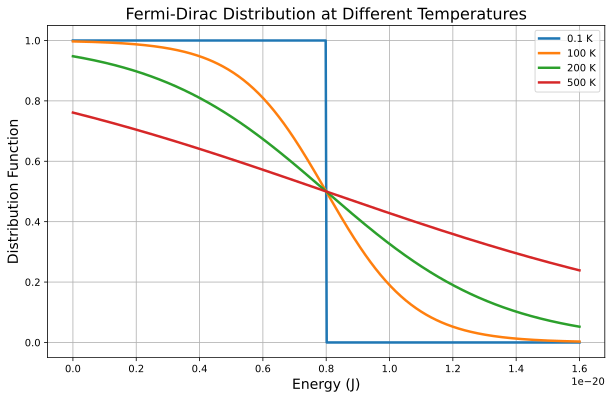

In [225]:
# Fermi-Dirac distribution
def fermi_dirac(E, T, Ef):
    exp_arg = (E - Ef) / (k_B * T)
    exp_arg_clipped = np.clip(exp_arg, None, 700)  # Prevent overflow
    fd_dist = 1 / (np.exp(exp_arg_clipped) + 1)
    # Handle very large exp_arg where exp_arg > 700 would lead to overflow
    fd_dist[exp_arg > 700] = 0
    return fd_dist

# Plotting
plt.figure(figsize=(10, 6))
for T in [0.1, 100, 200, 500]:
    plt.plot(E, fermi_dirac(E, T, Ef), label=f'{T} K', lw = 2.5)

# Adding labels and legend
plt.xlabel('Energy (J)',fontsize=14)
plt.ylabel('Distribution Function',fontsize=14)
plt.title('Fermi-Dirac Distribution at Different Temperatures', fontsize=16)
plt.legend()
plt.grid(True)

#saving figure
plt.savefig(f'Fermi-Dirac Distribution at Different Temperatures.png', bbox_inches = 'tight', dpi = 600)
# Show the plot
plt.show()

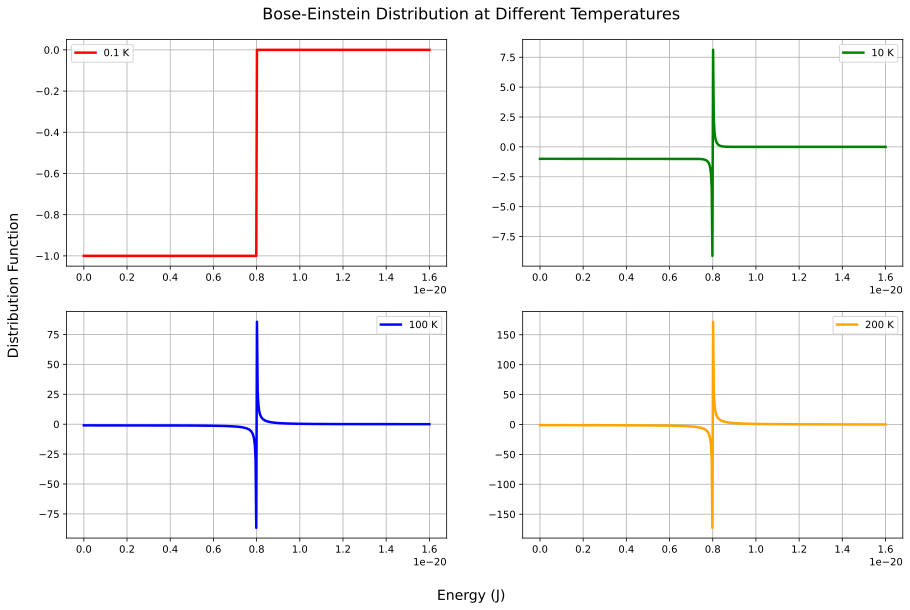

In [171]:
# Bose-Einstein distribution
def bose_einstein(E, T, Ef):
    exp_arg = (E - Ef) / (k_B * T)
    exp_arg_clipped = np.clip(exp_arg, None, 700)  # Prevent overflow
    be_dist = 1 / (np.exp(exp_arg_clipped) - 1)
    # Handle very large exp_arg where exp_arg > 700 would lead to overflow
    be_dist[exp_arg > 700] = 0
    return be_dist

colors = ['red', 'green', 'blue', 'orange']
T = [0.1, 10, 100, 200]
k = 0
# Plotting
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 9))
for i in range(2):
    for j in range(2):
        axs[i, j].plot(E, bose_einstein(E, T[k], Ef), label=f'{T[k]} K', lw = 2.5, color = colors[k])
        k += 1
        
        # Adding legend
        axs[i, j].legend()
        axs[i, j].grid(True)

# Adding labels
fig.suptitle('Bose-Einstein Distribution at Different Temperatures', fontsize=16, y = 0.93)
fig.supxlabel('Energy (J)', fontsize=14)
fig.supylabel('Distribution Function', fontsize=14, x = 0.07)

#saving and showing figure
plt.savefig(f'Bose-Einstein Distribution at Different Temperatures.png', bbox_inches = 'tight', dpi = 600)
plt.show()

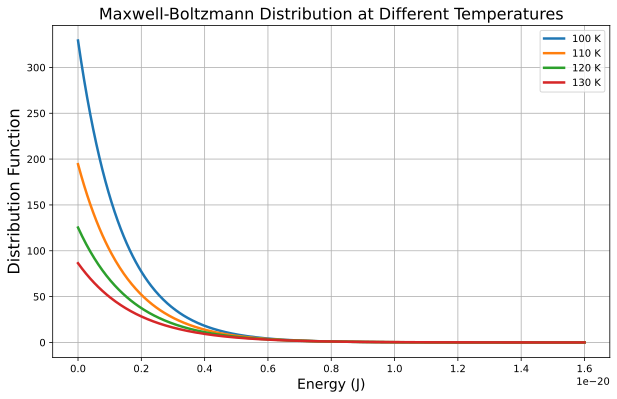

In [236]:
# Maxwell-Boltzmann distribution
def maxwell_boltzmann(E, T, Ef):
    exp_arg = (E - Ef) / (k_B * T)
    exp_arg_clipped = np.clip(exp_arg, None, 700)  # Prevent overflow
    mb_dist = 1 / np.exp(exp_arg_clipped)
    # Handle very large exp_arg where exp_arg > 700 would lead to overflow
    mb_dist[exp_arg > 700] = 0
    return mb_dist

# Plotting
plt.figure(figsize=(10, 6))
for T in [100, 110, 120, 130]:
    plt.plot(E, maxwell_boltzmann(E, T, Ef), label=f'{T} K', lw = 2.5)
    
# Adding labels and legend
plt.xlabel('Energy (J)', fontsize=14)
plt.ylabel('Distribution Function', fontsize=16)
plt.title('Maxwell-Boltzmann Distribution at Different Temperatures', fontsize = 16)
plt.legend()
plt.grid(True)

#save figure
plt.savefig(f'Maxwell-Boltzmann Distribution at Different Temperatures.png', bbox_inches = 'tight', dpi = 600)
# Show the plot
plt.show()

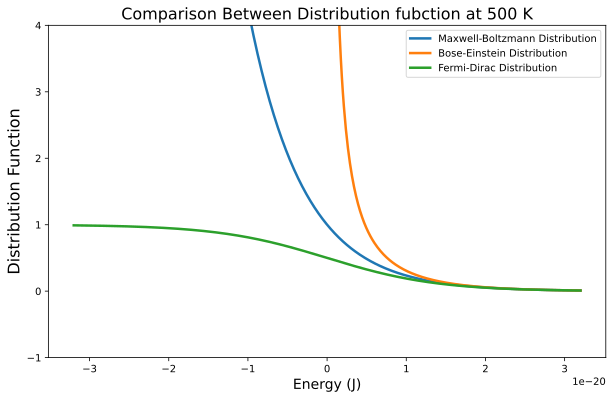

In [233]:
def comparasion(E, T, Ef, a):
    exp_arg = (E - Ef) / (k_B * T)
    exp_arg_clipped = np.clip(exp_arg, None, 700)  # Prevent overflow
    dist = 1 / (np.exp(exp_arg_clipped) + a)
    # Handle very large exp_arg where exp_arg > 700 would lead to overflow
    dist[exp_arg > 700] = 0
    return dist

T = 500
Ef = 0
k_B = 1.38e-23
E = np.linspace(-0.2*1.6e-19, 0.2*1.6e-19, 500)
dist_label = ['Maxwell-Boltzmann Distribution', 'Bose-Einstein Distribution', 'Fermi-Dirac Distribution']
a = [0, -1, 1]

plt.figure(figsize=(10, 6))

for i in range(3):
    dist_c = comparasion(E, T, Ef, a[i])
    if i == 1:
        max_pos = np.argmax(dist_c)
        plt.plot(E[max_pos:], dist_c[max_pos:], label = dist_label[i], lw = 2.5)
    else:
        plt.plot(E, dist_c, label = dist_label[i], lw = 2.5)

plt.legend()
plt.ylim(-1, 4)
#plt.xlim(-3e-20, 3e-20)
plt.xlabel('Energy (J)', fontsize=14)
plt.ylabel('Distribution Function', fontsize=16)
plt.title('Comparison Between Distribution fubction at 500 K', fontsize = 16)
plt.savefig('Comparison Between Distribution fubction at 500 K.png', bbox_inches = 'tight', dpi = 600)
plt.show()